# Linear Support Vector Classifier


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm, datasets
from scipy import stats
from sklearn.svm import SVR

import seaborn as sns; sns.set()

In [42]:
X = [1,5,1.5,8,1,9]
Y = [2,8,1.8,8,0.6,11]

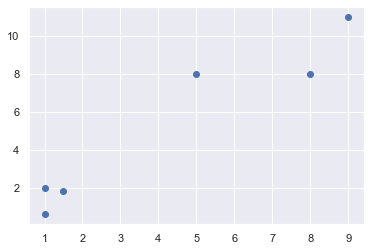

In [43]:
plt.scatter(X,Y)
plt.show()

In [44]:
data = np.array(list(zip(X,Y)))

In [45]:
data

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [46]:
target = [0, 1, 0, 1, 0, 1] #Clasificación de nuestro conjunto coordenado

In [47]:
classifier = svm.SVC(kernel="linear", C = 1.0) #Creamos nuestro clasificador. Especificamos el tipo de separador,
#Es decir, el hiperplano. Forma de evaluar como queremos la clasificación (c).
classifier.fit(data, target) #Finalmente ajustamos los datos con la clasificación de los datos

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [48]:
p = np.array([10.32, 12.67]).reshape(1,2)
print(p)
classifier.predict(p)

[[10.32 12.67]]


array([1])

* Modelo: w0 . x + w1 . y + e = 0 ponderando las variables por un peso obtenido por el modelo

* Ecuación del hiperplano en 2D: y = a . x + b 

In [49]:
w = classifier.coef_[0]
w

array([0.1380943 , 0.24462418])

In [50]:
a = -w[0]/w[1]
a

-0.5645161290322581

In [51]:
b = -classifier.intercept_[0]/w[1]
b

6.734677437813051

In [52]:
xx = np.linspace(0,10) #generamos un vector 
yy = a * xx + b #obtenemos la línea del hiperplano

[]

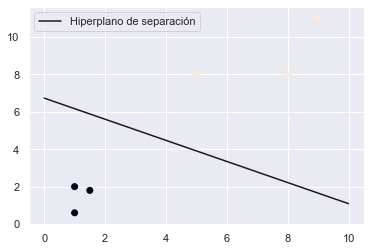

In [53]:
plt.plot(xx, yy, 'k-', label = "Hiperplano de separación")
plt.scatter(X, Y, c = target)
plt.legend()
plt.plot()

In [54]:
from sklearn.datasets.samples_generator import make_blobs #generador de muestras (haciendo burbujas)

In [55]:
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6) #cincuenta burbujas en dos distribuciones
#cuestiones de reproducibidad y la desviación estándar en el 60%

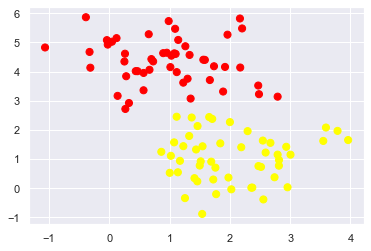

In [100]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn") # X todas las filas en la columan cero y uno. Color con Y
#sample 50 y cmap para pintar de rojo y amarillo

(-1, 3.5)

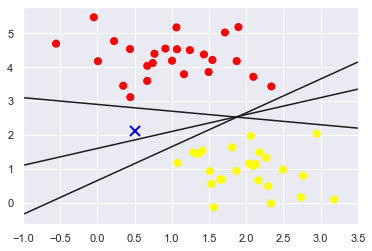

In [57]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")
plt.plot([0.5], [2.1], 'x', color="blue", markeredgewidth=2, markersize=10)

for a, b in [(1,0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
    
plt.xlim(-1,3.5)

In [62]:
from sklearn.svm import SVC

In [64]:
#Técnica de Machine:
#Utilizamos una técnica para entrenar el modelo y a partir de ahí ese modelo se utiliza para clasificar los datos  
model=SVC(kernel="linear", C = 1E10) 
model.fit(X,Y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [103]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    #print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "black");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

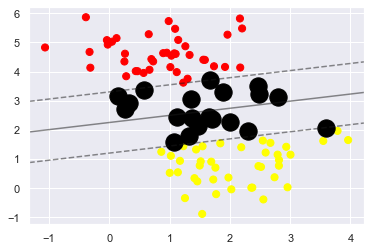

In [104]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
plt_svc(model, plot_support=True)

In [67]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s = 50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)
    

[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


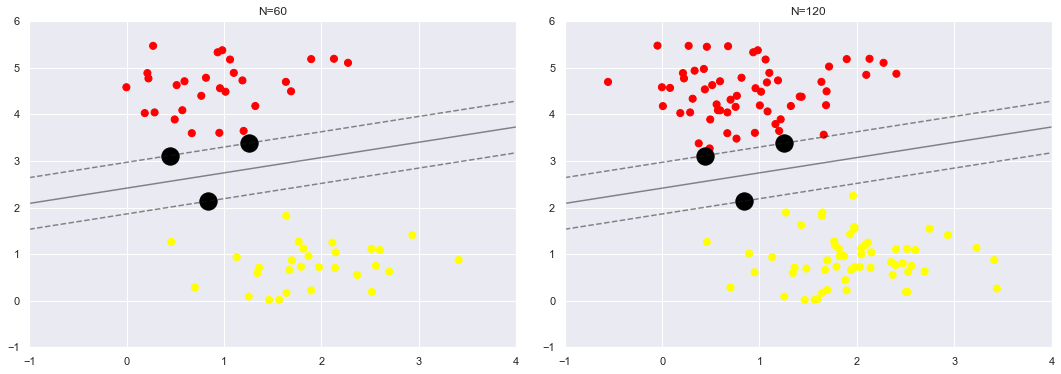

In [68]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right = 0.95, wspace = 0.1)
for ax_i, N, in zip(ax, [60, 120]):
    plot_svm(N, ax_i)
    ax_i.set_title("N={0}".format(N))

# Identificar fronteras no lineales

In [70]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

In [71]:
# Creamos un muestreo
X, Y = make_circles(100, factor = .1, noise = .1) 

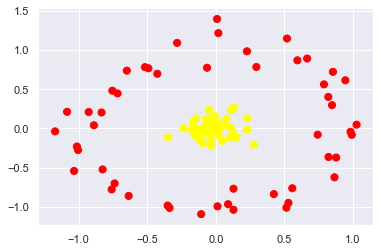

In [73]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

In [91]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
   # print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "black");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

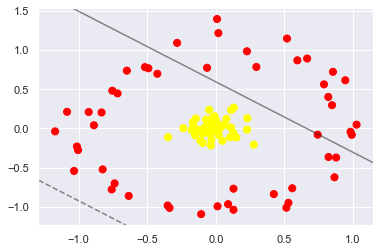

In [92]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [79]:
r = np.exp(-(X**2).sum(1))
r

array([0.33634141, 0.20460714, 0.98238226, 0.14231048, 0.34085545,
       0.99939186, 0.28062361, 0.40326852, 0.25665047, 0.964934  ,
       0.57199449, 0.38152561, 0.99775057, 0.43394536, 0.96634506,
       0.54436277, 0.99925969, 0.97964585, 0.99579224, 0.98724044,
       0.37158006, 0.32957126, 0.2955617 , 0.93522944, 0.97909615,
       0.38003228, 0.88696575, 0.4539947 , 0.99860598, 0.51290223,
       0.97283823, 0.99253441, 0.97666952, 0.33495964, 0.95772278,
       0.29906822, 0.48007509, 0.99848323, 0.99326848, 0.449426  ,
       0.9635343 , 0.9871829 , 0.9972295 , 0.49531714, 0.99285087,
       0.35523616, 0.27568372, 0.99659572, 0.31881853, 0.4143818 ,
       0.22754969, 0.28087433, 0.98807289, 0.31928588, 0.44534169,
       0.38981662, 0.2893557 , 0.41544828, 0.99923704, 0.99426892,
       0.87550366, 0.49092827, 0.99027271, 0.93249616, 0.94895798,
       0.25372282, 0.99073743, 0.94329587, 0.97528954, 0.3066812 ,
       0.98475236, 0.54694668, 0.3387391 , 0.96944221, 0.44626

In [80]:
from mpl_toolkits import mplot3d

In [81]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    

In [82]:
from ipywidgets import interact, fixed

In [83]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-3.50506663e-01, -9.83246472e-01],
       [ 5.19674159e-01,  1.14743292e+00],
       [-7.03808147e-02,  1.13231266e-01],
       [ 9.81343491e-03,  1.39629791e+00],
       [-1.01153459e+00, -2.30422587e-01],
       [ 2.45633535e-02, -2.22966507e-03],
       [-2.81371589e-01,  1.09159104e+00],
       [ 8.77696804e-01, -3.71215526e-01],
       [-1.03243487e+00, -5.42326844e-01],
       [ 1.49678161e-01, -1.15291036e-01],
       [ 7.43158937e-01, -7.96285901e-02],
       [-6.47548971e-01,  7.37738189e-01],
       [ 4.14860112e-02,  2.30406916e-02],
       [ 8.20487626e-01,  4.02040686e-01],
       [-1.65842468e-01,  8.20401364e-02],
       [ 1.29626409e-01, -7.68984002e-01],
       [-2.02990431e-02, -1.81255347e-02],
       [ 1.29762266e-01, -6.10401731e-02],
       [-2.04614661e-02,  6.16276713e-02],
       [ 1.13138082e-01,  6.43751052e-03],
       [ 9.91650518e-01, -8.13645877e-02],
       [ 5.95148452e-01,  8.69345164e-01],
       

In [86]:
# Cuando no podemos centrar los puntos a una sola función, cambiamos el kernel del modelo a la función rbf
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

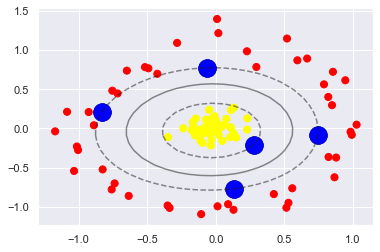

In [87]:
# la primer línea nos incorpora únicamente los puntos
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
# La segunda nos incorpora las líneas
plt_svc(rbf)
#La última nos agrega los vectores de soporte. Los cuales ya estaban integrados en la función plt_svc
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

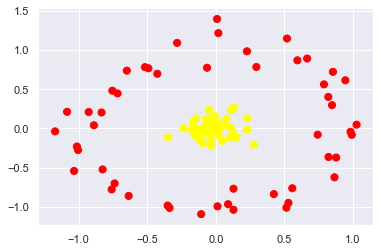

In [88]:
# la primer línea nos incorpora únicamente los puntos
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

## Ajustar los parámetros de SVM

In [93]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)

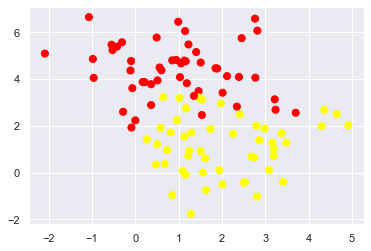

In [95]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
#model = SVC(kernel="linear", C=10)
#model.fit(X,Y)
#plt_svc(model)

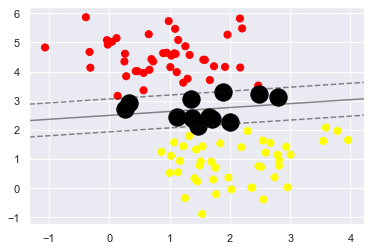

In [108]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=0.5)
model.fit(X,Y)
plt_svc(model)

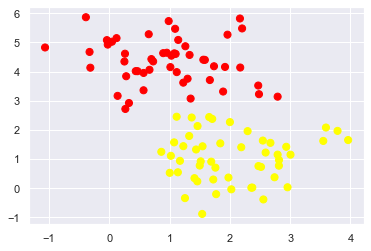

In [96]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

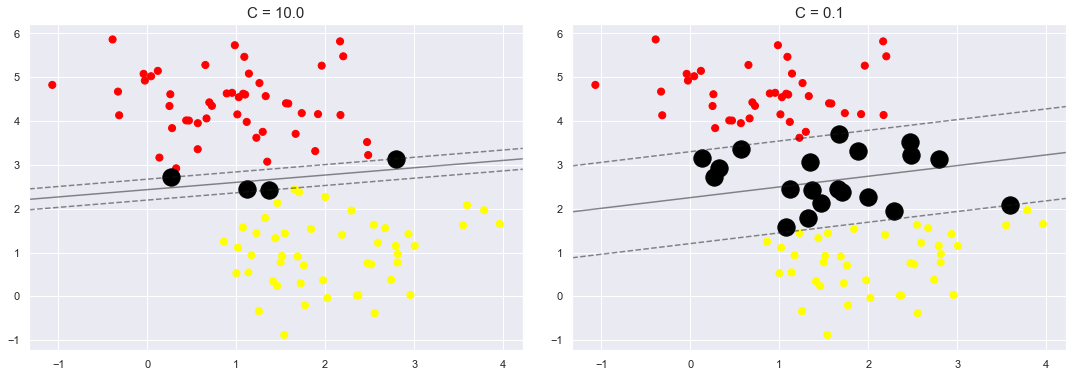

In [97]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)

# Reconocimiento Facial

In [109]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [110]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [111]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [112]:
print(faces.images.shape)

(1348, 62, 47)


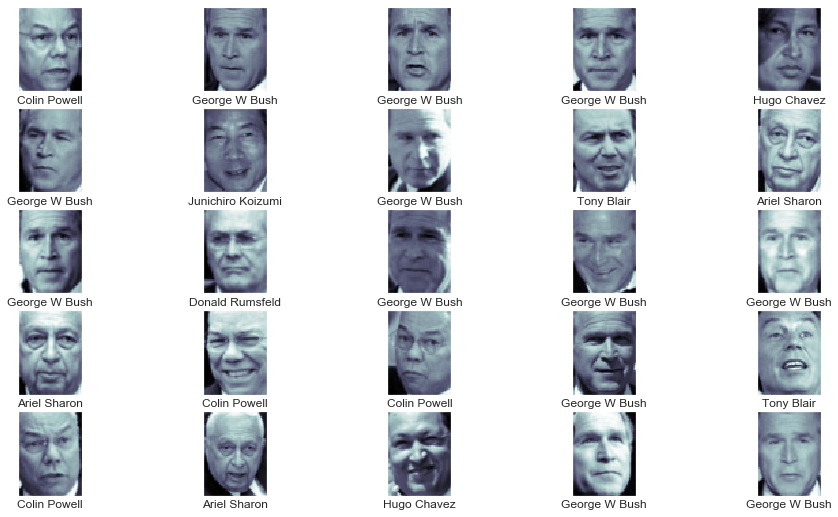

In [113]:
fig, ax = plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

In [118]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandominzedPCA #Principal component analisis
from sklearn.pipeline import make_pipeline

In [119]:
pca = RandominzedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel="rbf", class_weight="balanced")
model = make_pipeline(pca, svc)

In [121]:
from sklearn.model_selection import train_test_split

In [124]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
param_grid = {
    "svc__C":[0.1,1,5,10,50],
    "svc__gamma":[0.0001, 0.0005, 0.001, 0.005, 0.01]
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, Ytrain)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 1min 14s, sys: 709 ms, total: 1min 14s
Wall time: 21.1 s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
  

In [127]:
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [128]:
classifier = grid.best_estimator_
yfit = classifier.predict(Xtest)

Text(0.5, 0.98, 'Predicciones de las imágnes (incorrectas en rojo)')

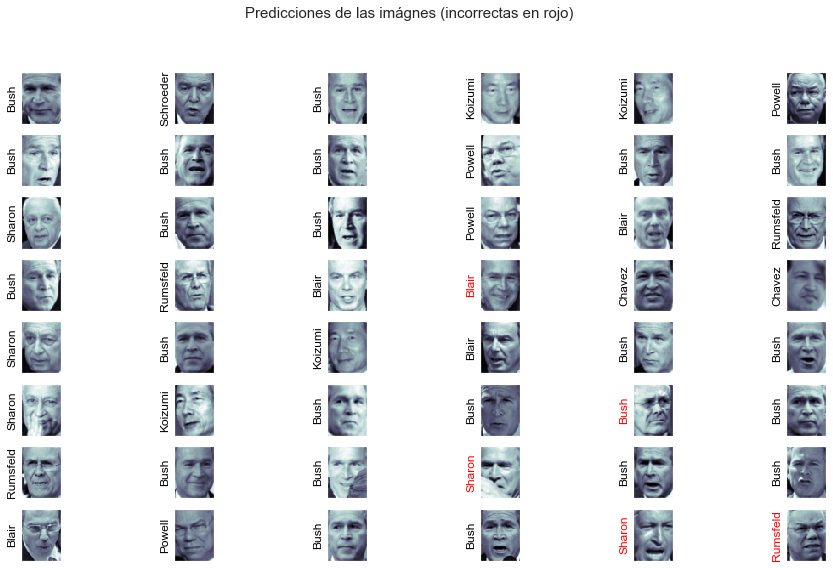

In [129]:
fig, ax = plt.subplots(8,6,figsize=(16,9))

for i, ax_i in enumerate(ax.flat): # ennumero los ejes para que me devuelva no solo el eje sino también posición
    ax_i.imshow(Xtest[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = "black" if yfit[i]==Ytest[i] else "red")

fig.suptitle("Predicciones de las imágnes (incorrectas en rojo)", size = 15)

In [130]:
from sklearn.metrics import classification_report

In [131]:
print(classification_report(Ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
mat = confusion_matrix(Ytest, yfit)

In [134]:
import seaborn as sns; sns.set()

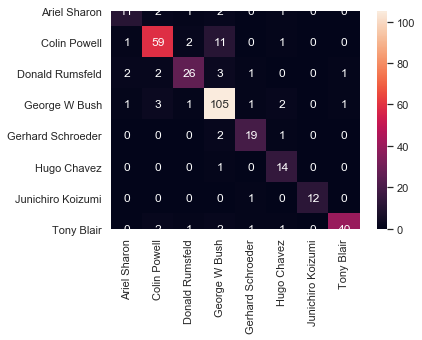

In [135]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=faces.target_names, yticklabels=faces.target_names )

# Clasificación de flores iris

In [3]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [6]:
X = iris.data[:, :2]
Y = iris.target

In [11]:
#Fijamos los límites de nuestro gráfico
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
# Incremento entre uno y otro
h = (x_max - x_min)/100
#
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#COmbinamos xx con yy para obtener la Parrilla de dibujo.
X_plot = np.c_[xx.ravel(), yy.ravel()]

In [12]:
X_plot

array([[3.3  , 1.   ],
       [3.356, 1.   ],
       [3.412, 1.   ],
       ...,
       [8.732, 5.368],
       [8.788, 5.368],
       [8.844, 5.368]])

In [13]:
C = 1.0
svc = svm.SVC(kernel="linear", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Lineal')

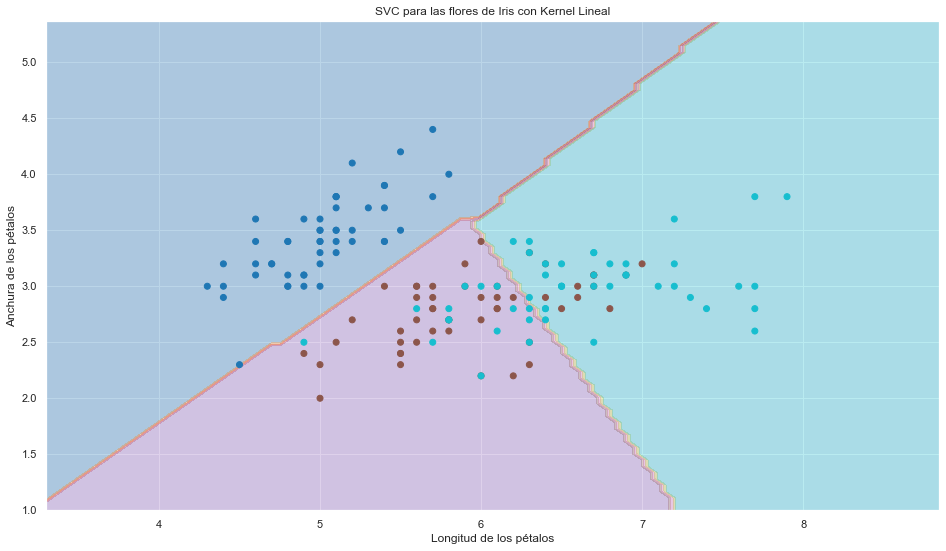

In [14]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Lineal")

In [38]:
C = 10
svc = svm.SVC(kernel="rbf", C=C, gamma=0.01, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Radial')

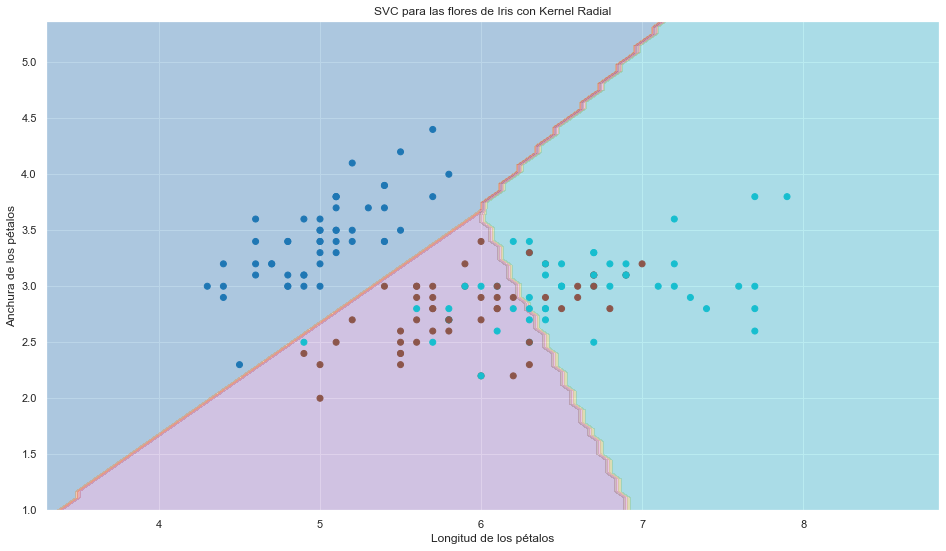

In [39]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Radial")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Sigmoide')

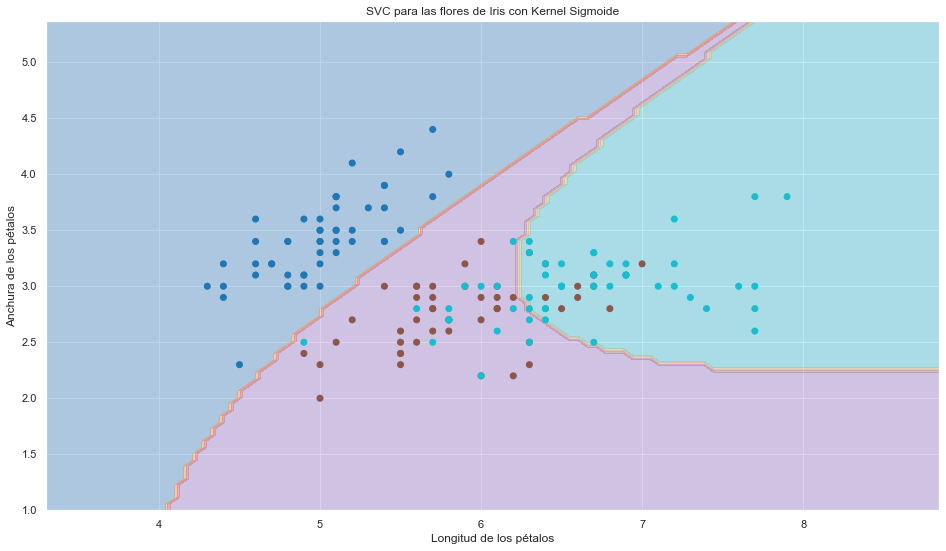

In [17]:
C = 1.0
svc = svm.SVC(kernel="poly", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Sigmoide")

In [18]:
#Estableceremos los valores óptimos con un cross validation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [19]:
#Revolvemos los datos para que no estén organizados en tres grupos
X, Y = shuffle(X,Y, random_state = 0)

In [20]:
#Fabricamos los modelos de prueba y entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [22]:
#Creamos un diccionario el cual será un array donde el primer diccionario tendrá un parámetro kernel rbf permitiendo 
#márgenes mas "tranquilos"
#El segundo prámetro será un kernel lineal
parameters = [
    {
        'kernel': ['rbf'],
        'gamma' : [1e-4,1e-3,1e-2, 0.1, 0.2, 0.5],
        'C': [1,10,100,1000]
    },
    {
        'kernel':["linear"],
        'C':[1,10,100,1000]
    }
]

In [23]:
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters, cv=5)
clf.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [25]:
clf.cv_results_

{'mean_fit_time': array([0.00100608, 0.00090303, 0.00077605, 0.00059047, 0.0005949 ,
        0.00058599, 0.00076685, 0.0008224 , 0.00085025, 0.0006237 ,
        0.00056477, 0.00076437, 0.0007937 , 0.00052624, 0.00049567,
        0.0005218 , 0.00061336, 0.00081401, 0.00048032, 0.00047588,
        0.00058756, 0.00112915, 0.00166397, 0.00179434, 0.00041819,
        0.00044394, 0.00078869, 0.00453553]),
 'std_fit_time': array([2.32586747e-04, 3.30876888e-05, 8.48831753e-05, 4.60044325e-05,
        7.75612539e-05, 7.66542095e-05, 8.92792234e-05, 5.37498493e-05,
        8.38053209e-05, 5.15879630e-05, 7.30726147e-05, 1.70695448e-04,
        7.42072609e-05, 2.91520316e-05, 5.22222686e-05, 2.41491541e-05,
        7.48963193e-05, 1.59648997e-04, 7.80849056e-06, 2.29462245e-05,
        7.77530618e-05, 3.98792944e-04, 6.73168656e-04, 4.97645841e-04,
        2.41158949e-05, 7.04848552e-06, 3.33601765e-04, 2.60555419e-03]),
 'mean_score_time': array([0.00039406, 0.00041199, 0.00029182, 0.00028224, 

In [26]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m, s, p in zip(means, stds, params):
    print("%0.3f (+/-%0.3f) para %r"%(m, 2*s, p))

0.747 (+/-0.124) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.807 (+/-0.129) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.787 (+/-0.124) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.780 (+/-0.116) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 (+/-0.124) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.773 (+/-0.098) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.780 (+/-0.116) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.767 (+/-0.126) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813 (+/-0.124) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.760 (+/-0.107) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.780 (+/-0.080) para {'C': 100, 'gamma'

In [27]:
y_pred = clf.predict(X_test)

In [28]:
print(classification_report(Y_test, y_pred, target_names=["setosa", "versicolor","virginica"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.60      0.82      0.69        11
   virginica       0.83      0.62      0.71        16

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38



# Resumen final de la clasificación de Iris

In [33]:
def svm_iris(C=1.0, gamma = 0.01, kernel = "rbf"):
    import pandas as pd
    import numpy as np
    from sklearn import svm, datasets
    import matplotlib.pyplot as plt

    iris = datasets.load_iris()
    
    
    X = iris.data[:, :2]
    Y = iris.target

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    h = (x_max - x_min)/100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    X_plot = np.c_[xx.ravel(), yy.ravel()]

    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape="ovr").fit(X,Y)
    Ypred = svc.predict(X_plot)
    Ypred = Ypred.reshape(xx.shape)
    plt.figure(figsize=(16,9))
    plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
    plt.xlabel("Longitud de los pétalos")
    plt.ylabel("Anchura de los pétalos")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC para las flores de Iris con Kernel "+kernel)

In [34]:
from ipywidgets import interact, fixed

In [35]:
interact(svm_iris, C=[0.01, 0.1, 1,10,100,1000, 1e6, 1e10],
        gamma=[1e-5,1e-4,1e-3,1e-2, 0.1, 0.2, 0.5,0.99],
        kernel=["rbf","linear","sigmoid","poly"])

interactive(children=(Dropdown(description='C', index=2, options=(0.01, 0.1, 1, 10, 100, 1000, 1000000.0, 1000…

<function __main__.svm_iris(C=1.0, gamma=0.01, kernel='rbf')>

# SVM para Regresión

Object `ravel` not found.


In [40]:
X = np.sort(5*np.random.rand(200,1),axis=0)
Y = np.sin(X).ravel()
Y[::5] += 3*(0.5 - np.random.rand(40))

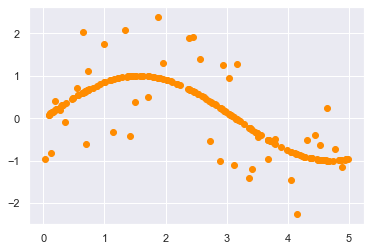

In [41]:
plt.scatter(X,Y, color="darkorange", label="data")

In [45]:
# para el uso de SVR debemos importar de sklearn.svm el método de SVR (suport vector regression)
C=1e3
svr_lin = SVR(kernel="linear", C=C)
svr_rbf = SVR(kernel="rbf", C=C, gamma=0.1)
svr_pol = SVR(kernel="poly", C=C, degree=3)

In [46]:
y_lin = svr_lin.fit(X,Y).predict(X)
y_rbf = svr_rbf.fit(X,Y).predict(X)
y_pol = svr_pol.fit(X,Y).predict(X)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


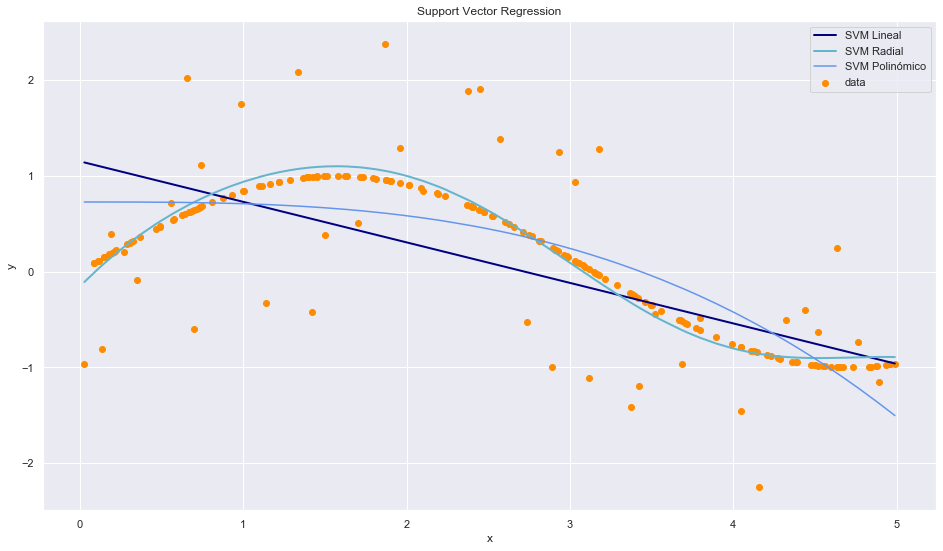

In [47]:
lw = 2
plt.figure(figsize=(16,9))
plt.scatter(X,Y,color="darkorange", label ="data")
plt.plot(X,y_lin, color="navy", lw = lw, label = "SVM Lineal")
plt.plot(X,y_rbf, color="c", lw=lw, label="SVM Radial")
plt.plot(X,y_pol, color="cornflowerblue", label="SVM Polinómico")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Support Vector Regression")
plt.legend()
plt.show()